# 🫀 Heart Disease Prediction using Machine Learning


## 📌 Introduction

Heart disease is one of the leading causes of death worldwide and poses a serious public health challenge. Early identification of individuals at risk is crucial for prevention and treatment.

This project uses a health indicators dataset to predict whether a patient is likely to have heart disease or suffer a heart attack. It demonstrates how data science and machine learning can contribute to solving real-world healthcare problems.


## 🎯 Project Objective

1. Build an accurate classification model to predict heart disease or heart attack risk.
2. Identify the most influential features using `feature_importances_` from tree-based models.
3. Handle class imbalance using **random oversampling and undersampling** techniques.
4. Compare multiple models and evaluate them using AUC, precision, and recall.

**Dataset:** [Kaggle - Heart Disease Health Indicators](https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset)  
**Tools & Libraries:** Python, numpy, Pandas, Scikit-learn, , Matplotlib, Seaborn


### Import libraries and load dataset

In [1]:
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve,classification_report,accuracy_score,recall_score,precision_score
data = pandas.read_csv("Heart_Disease_Dataset.csv")
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0


### Exploratory Data Analysis :
(a).Including univariate analysis to understand the distribution of features.

analysis on categorical columns:
HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


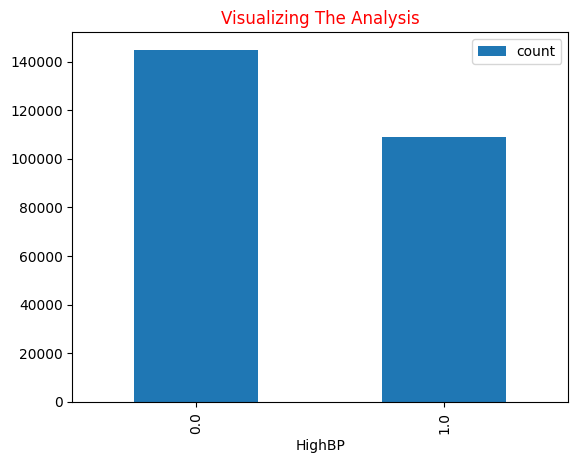


HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


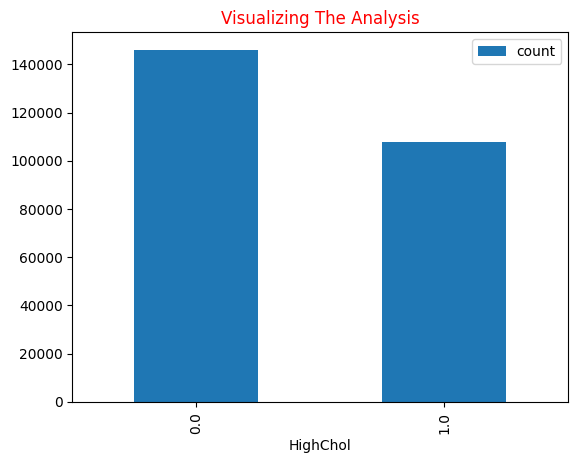


Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


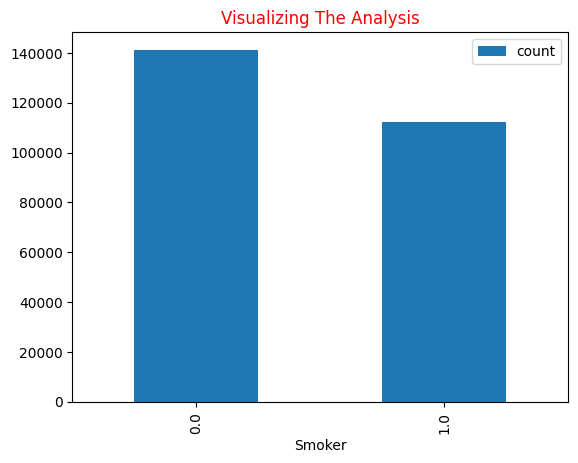


Diabetes
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


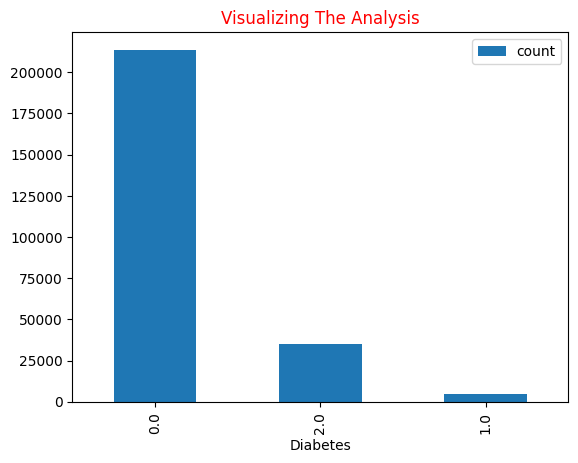


PhysActivity
1.0    191920
0.0     61760
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


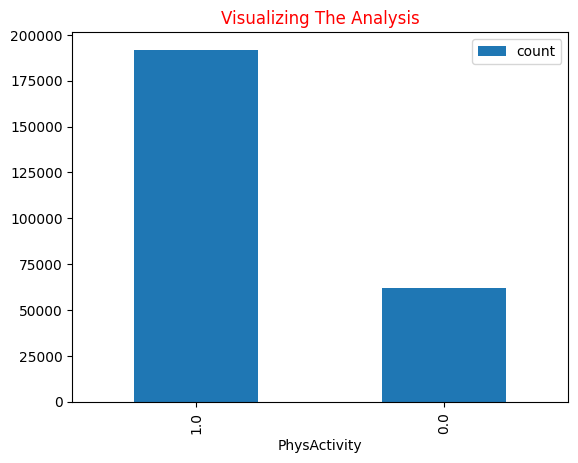


Fruits
1.0    160898
0.0     92782
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


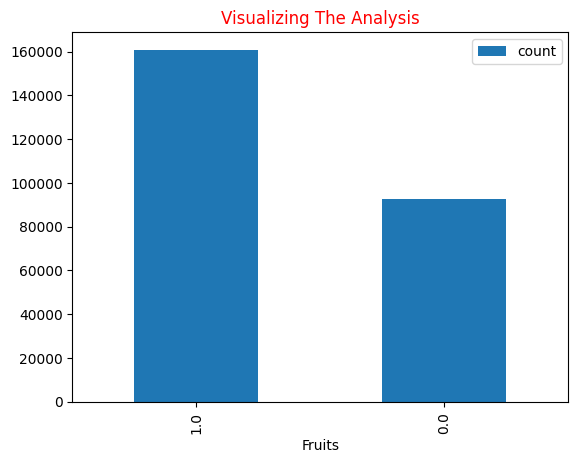


Veggies
1.0    205841
0.0     47839
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


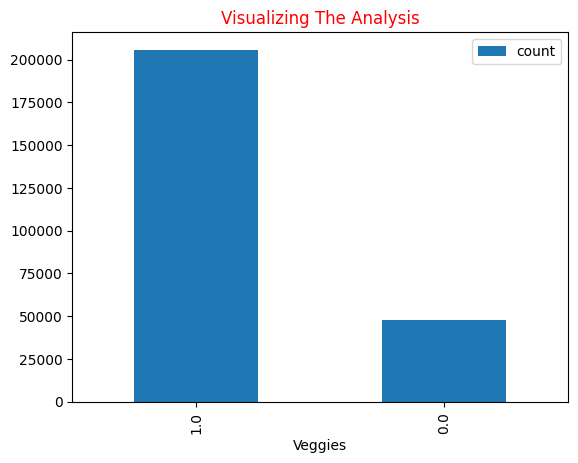


HvyAlcoholConsump
0.0    239424
1.0     14256
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


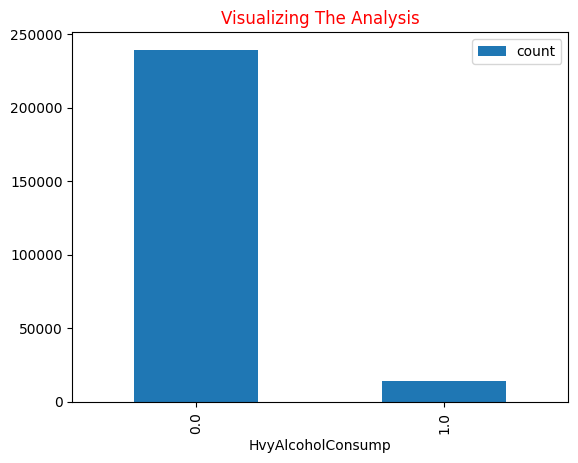


Sex
0.0    141974
1.0    111706
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


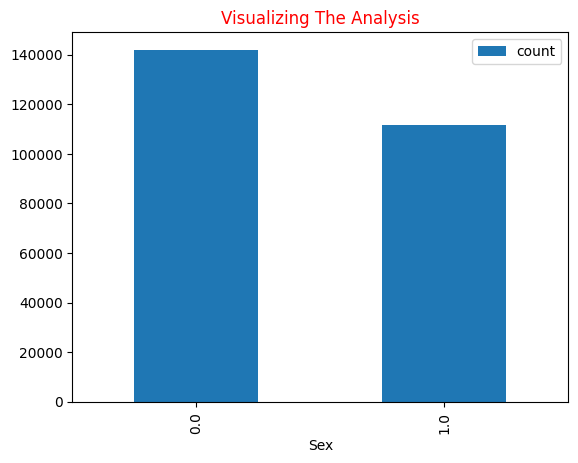


Age
9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


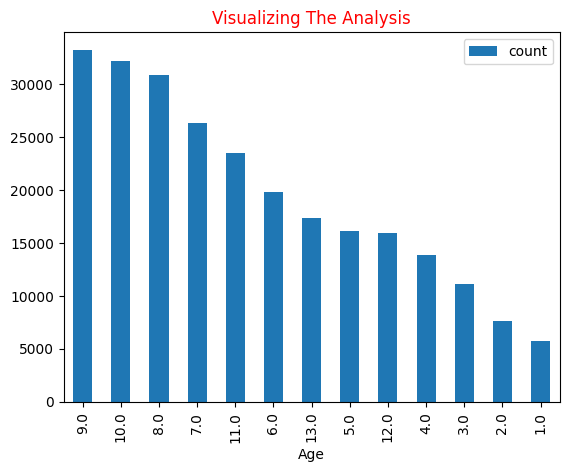


Education
6.0    107325
5.0     69910
4.0     62750
3.0      9478
2.0      4043
1.0       174
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


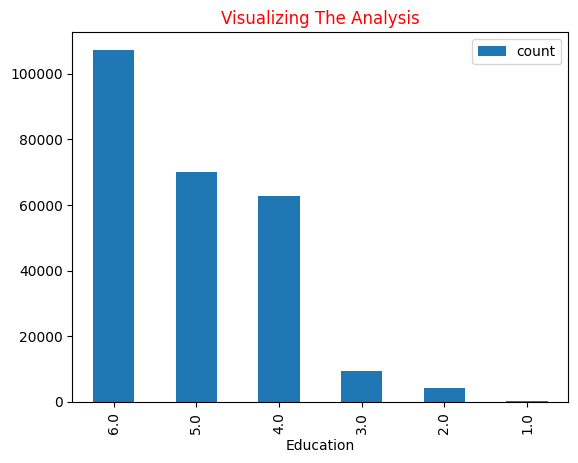


Income
8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


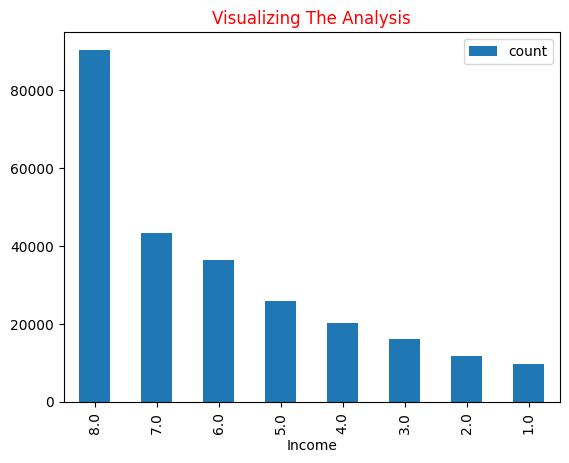


analysis on numerical columns:
                 BMI       MentHlth       PhysHlth
count  253680.000000  253680.000000  253680.000000
mean       28.382364       3.184772       4.242081
std         6.608694       7.412847       8.717951
min        12.000000       0.000000       0.000000
25%        24.000000       0.000000       0.000000
50%        27.000000       0.000000       0.000000
75%        31.000000       2.000000       3.000000
max        98.000000      30.000000      30.000000

median:
BMI         27.0
MentHlth     0.0
PhysHlth     0.0
dtype: float64

variance:
BMI         43.674839
MentHlth    54.950296
PhysHlth    76.002675
dtype: float64


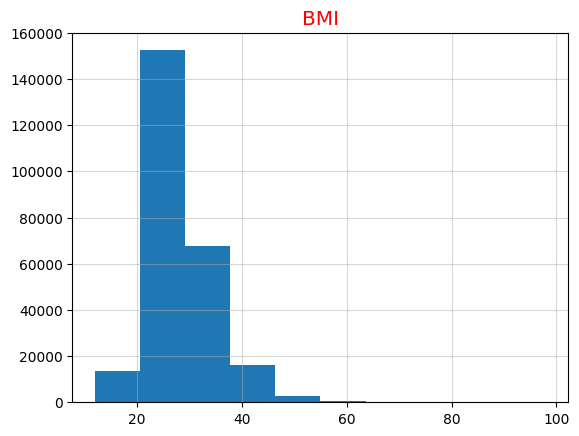

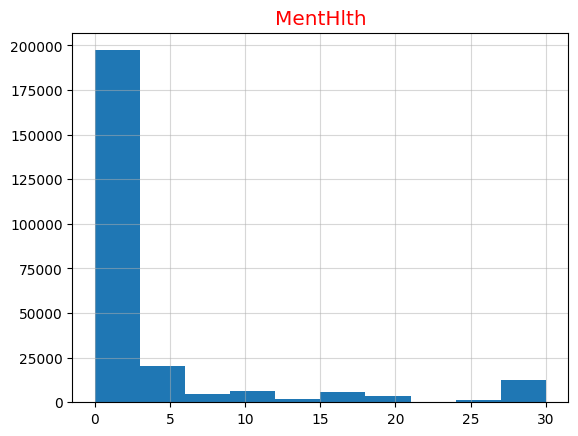

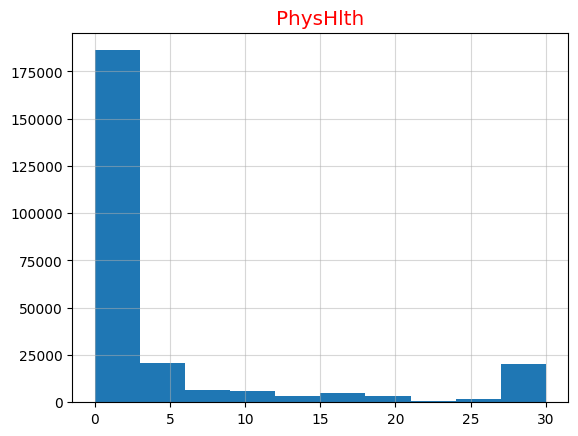

In [2]:
import pandas
import matplotlib.pyplot as plt
data = pandas.read_csv("Heart_Disease_Dataset.csv")
data.pop("HeartDiseaseorAttack")
x = data.loc[:,["BMI","MentHlth","PhysHlth"]]  
for i in x.columns:
    data.pop(i)                  
print("analysis on categorical columns:")
for i in data.columns:
    print(data[i].value_counts())
    print(data[i].value_counts().plot(kind = "bar"))
    plt.title("Visualizing The Analysis",color = "red")
    plt.legend()
    plt.show()
    print()
print("analysis on numerical columns:")
print(x.describe())
print()
print("median:")
print(x.median())
print()
print("variance:")
print(x.var())
for i in x.columns:
    x[i].hist()
    plt.title(i,color = "red",size = "x-large")
    plt.grid(alpha = 0.5)
    plt.show()

### (b).Including multivariate analysis to determine the correlations and analysis of target variables.

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

correlation of HeartDiseaseorAttack(target) with features:
Age                  0.221618
HighBP               0.209361
PhysHlth             0.181698
HighChol             0.180765
Diabetes             0.180272
Smoker               0.114441
Sex                  0.086096
MentHlth             0.064621
BMI                  0.052904
Fruits              -0.019790
HvyAlcoholConsump   -0.028991
Veggies             -0.039167
PhysActivity        -0.087299
Education           -0.099600
Income              -0.141011
Name: HeartDiseaseorAttack, dtype: float64


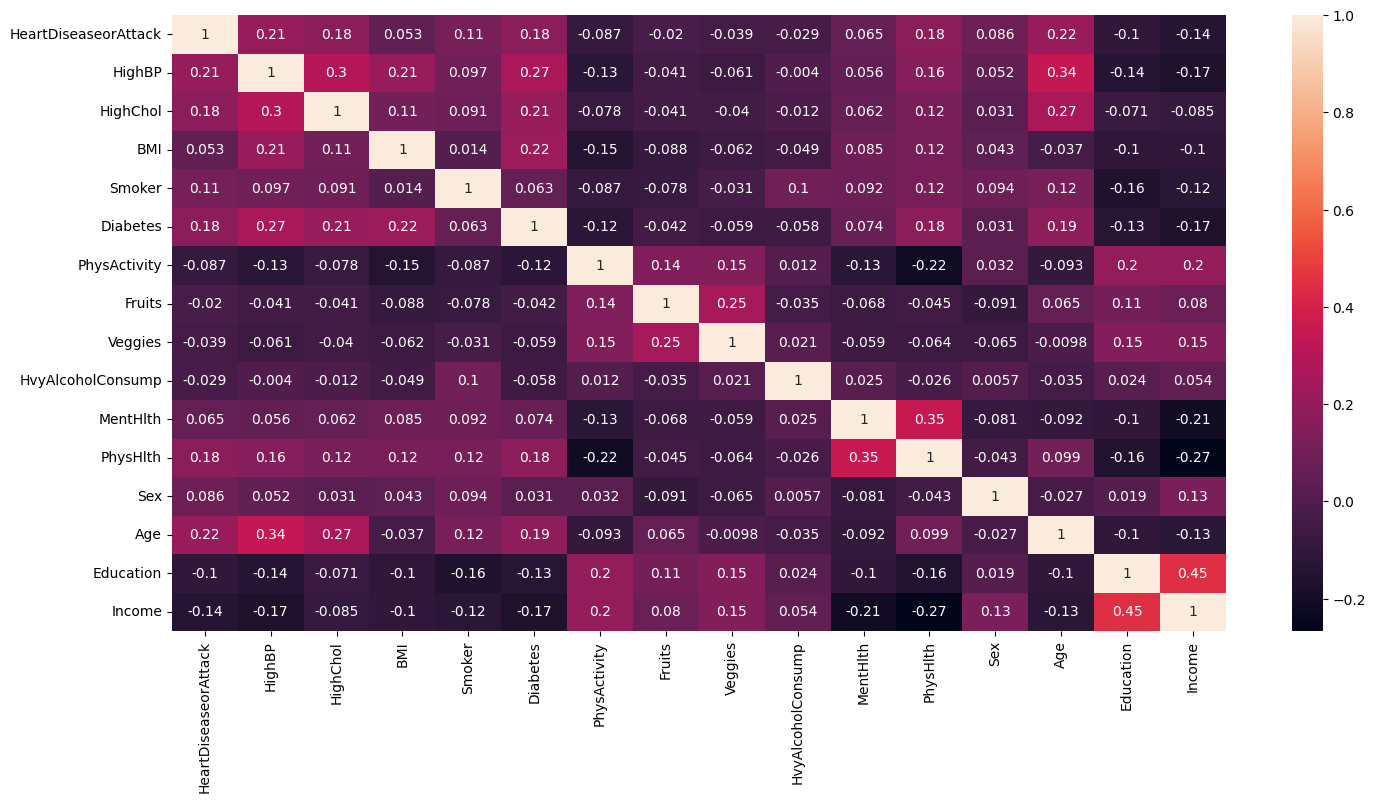

Analysis of HeartDiseaseorAttack(target) with HighBP (feature):


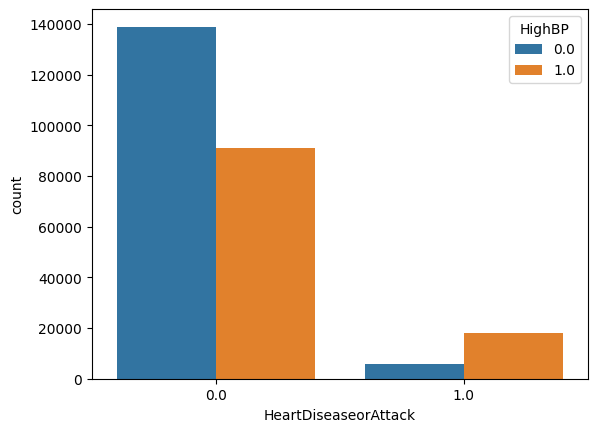

Analysis of HeartDiseaseorAttack(target) with HighChol (feature):


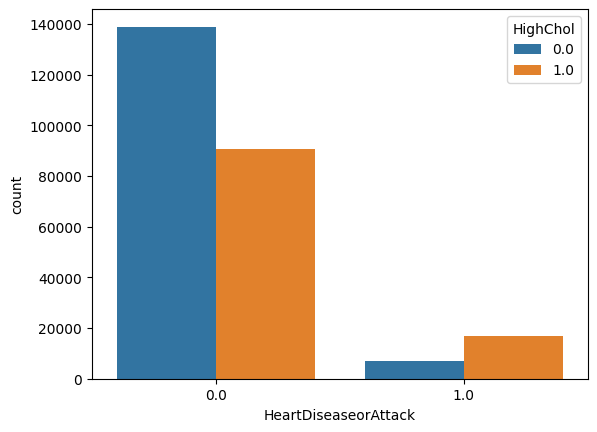

Analysis of HeartDiseaseorAttack(target) with BMI (feature):


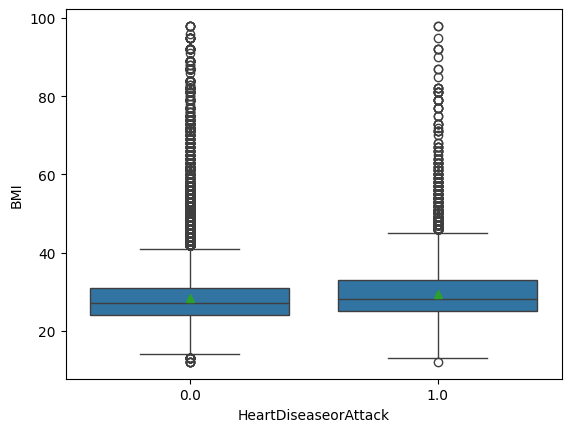

Analysis of HeartDiseaseorAttack(target) with Smoker (feature):


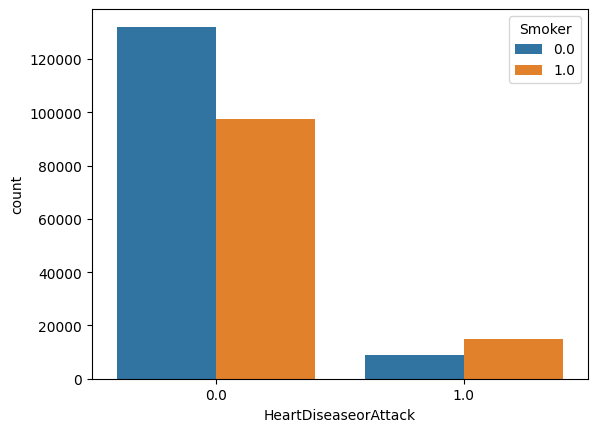

Analysis of HeartDiseaseorAttack(target) with Diabetes (feature):


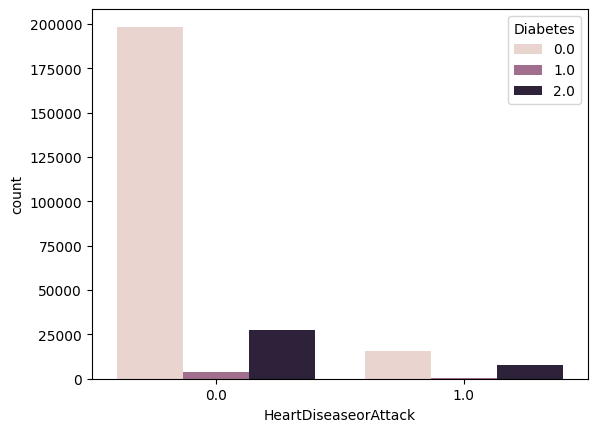

Analysis of HeartDiseaseorAttack(target) with PhysActivity (feature):


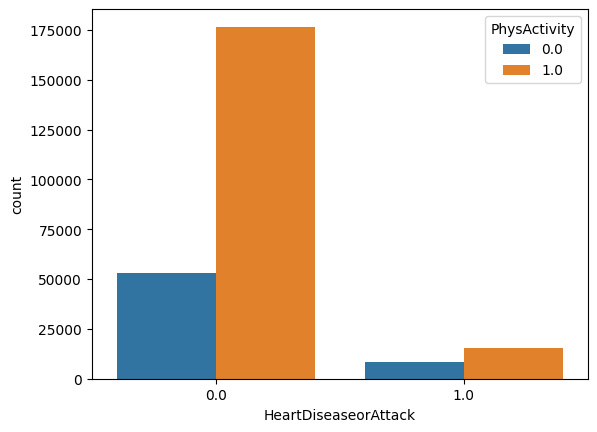

Analysis of HeartDiseaseorAttack(target) with Fruits (feature):


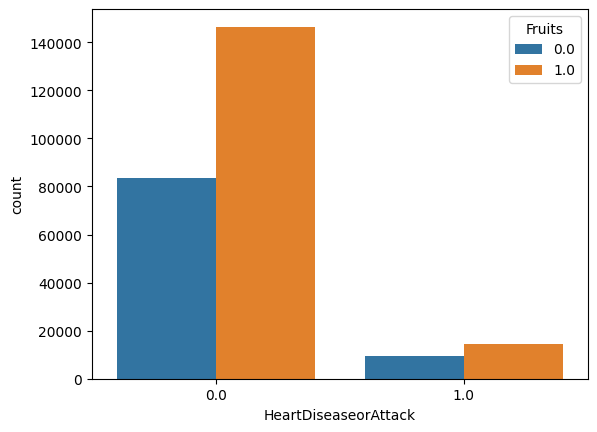

Analysis of HeartDiseaseorAttack(target) with Veggies (feature):


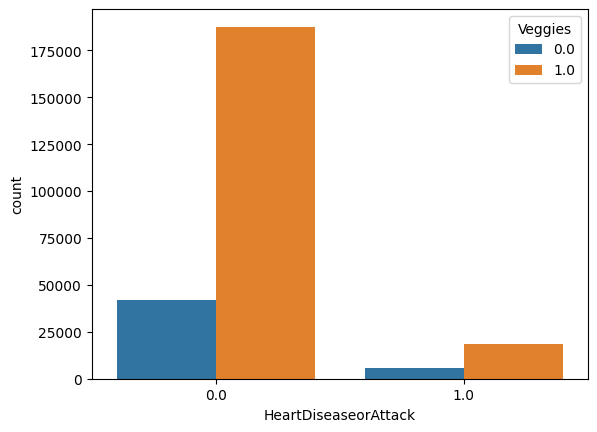

Analysis of HeartDiseaseorAttack(target) with HvyAlcoholConsump (feature):


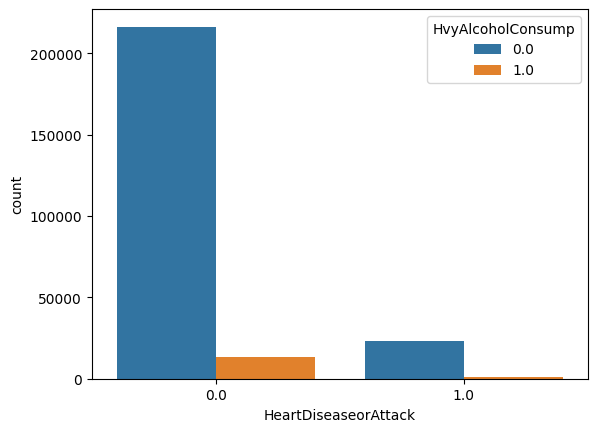

Analysis of HeartDiseaseorAttack(target) with MentHlth (feature):


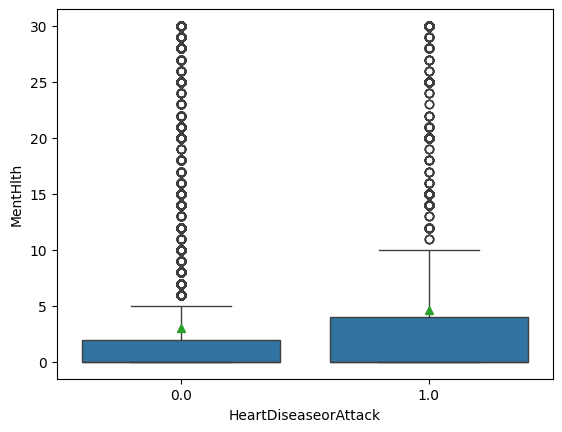

Analysis of HeartDiseaseorAttack(target) with PhysHlth (feature):


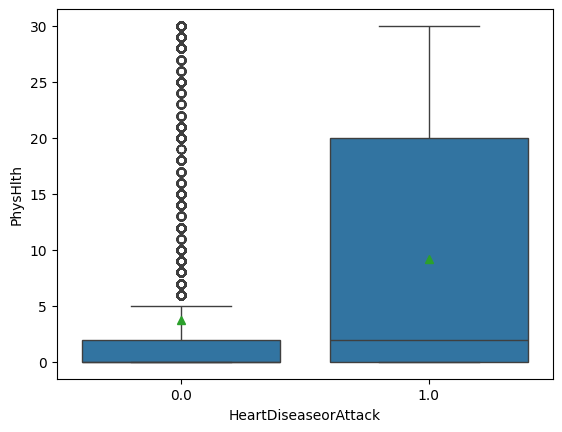

Analysis of HeartDiseaseorAttack(target) with Sex (feature):


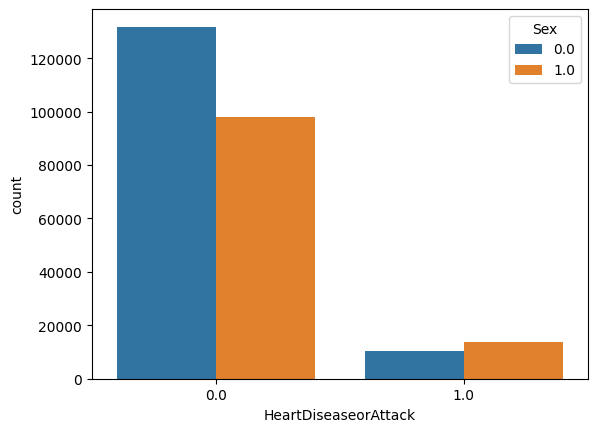

Analysis of HeartDiseaseorAttack(target) with Age (feature):


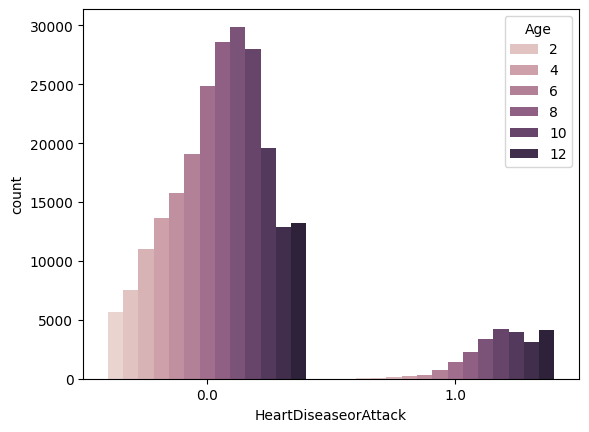

Analysis of HeartDiseaseorAttack(target) with Education (feature):


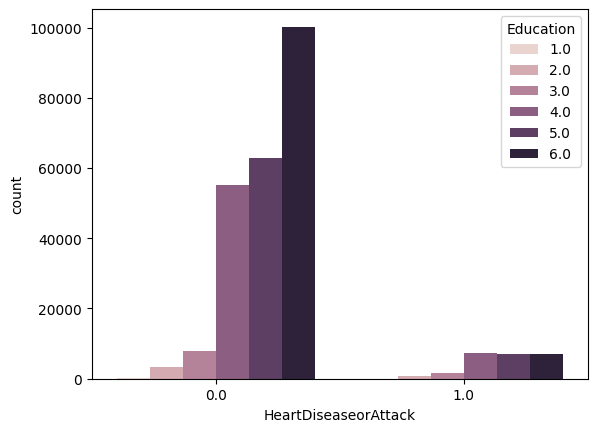

Analysis of HeartDiseaseorAttack(target) with Income (feature):


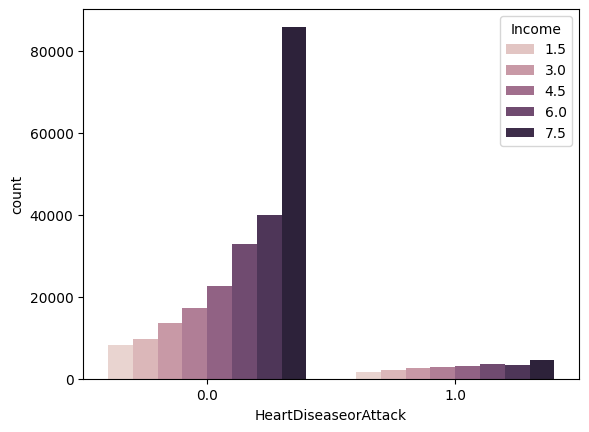

In [3]:
import pandas
import seaborn 
data = pandas.read_csv("Heart_Disease_Dataset.csv")
print(data["HeartDiseaseorAttack"].value_counts())
print()
print("correlation of HeartDiseaseorAttack(target) with features:")
v1 = data.corr()["HeartDiseaseorAttack"].sort_values(ascending = False)
v1.pop("HeartDiseaseorAttack")
print(v1)
plt.figure(figsize =(17,8))
seaborn.heatmap(data.corr(),annot = True)
plt.show()
columns = data.columns[1:]
for  i in columns:
    if i in ["MentHlth","PhysHlth","BMI"]:
        print("Analysis of HeartDiseaseorAttack(target) with",i,"(feature):") 
        seaborn.boxplot(x = "HeartDiseaseorAttack",y = i,data = data,showmeans = True)
        plt.show()
    else:
        print("Analysis of HeartDiseaseorAttack(target) with",i,"(feature):")
        seaborn.countplot(x = "HeartDiseaseorAttack",hue = i,data = data)
        plt.show()

###  (c).To determine if new features can be created, based on the given data

In [4]:
import numpy
import matplotlib.pyplot as plt
import seaborn
import pandas
data = pandas.read_csv("Heart_Disease_Dataset.csv")
print("yes new features can be created based on  the given data")
data["Smokers_with_Diabetes"] = data["Smoker"]*data["Diabetes"]
data["BMI_category"] = pandas.cut(data["BMI"],bins=[0, 18.5, 24.9, 29.9, 40], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
data['Risk_Score'] = data['HighBP'] + data['HighChol'] + data['Smoker'] + data['Diabetes']
data["Age_BMI_interaction"] = data["Age"]*data["BMI"]
print()
print(data.columns)
print(data.shape)
data.head()

yes new features can be created based on  the given data

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'BMI', 'Smoker',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income',
       'Smokers_with_Diabetes', 'BMI_category', 'Risk_Score',
       'Age_BMI_interaction'],
      dtype='object')
(253680, 20)


,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income,Smokers_with_Diabetes,BMI_category,Risk_Score,Age_BMI_interaction
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0,0.0,Obese,3.0,360.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0,Overweight,1.0,175.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0,0.0,Overweight,2.0,252.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0,Overweight,1.0,297.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0,0.0,Normal,2.0,264.0


### (d).Layout binary classification experimentation space (i.e.determine the list of models you would like to experiment with)


In [5]:
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
data = pandas.read_csv("Heart_Disease_Dataset.csv")
LR_model = LogisticRegression(max_iter = 1000)
RF_model = RandomForestClassifier(criterion = "gini",max_depth = 3)
GB_model =GradientBoostingClassifier()
print("Following are the list of models I would like to experiment with")
models = pandas.DataFrame({"MODELS":["Logistic Regression","Random Forest","Gradient Boosting"]},index = [1,2,3])
models

Following are the list of models I would like to experiment with


,MODELS
1,Logistic Regression
2,Random Forest
3,Gradient Boosting


### Using precision-recall curves to determine best threshold

### (1). with logistic regression

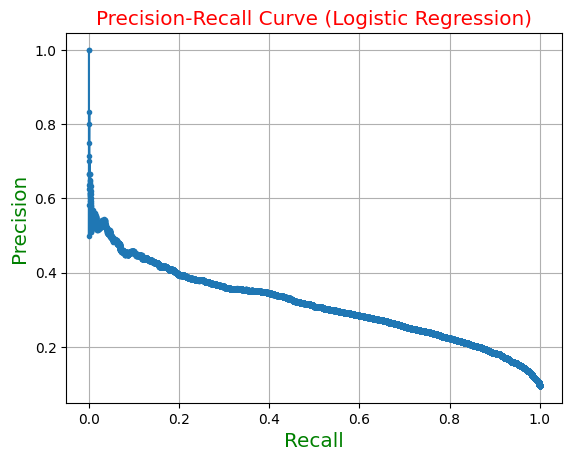

Best Threshold Using Logistic Regression is  0.16680857870764995

Logistic Regression Model Performance After Making Predictions Using the Best Threshold:
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90     45905
         1.0       0.29      0.58      0.39      4831

    accuracy                           0.83     50736
   macro avg       0.62      0.71      0.64     50736
weighted avg       0.89      0.83      0.85     50736



In [6]:
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve,classification_report
data = pandas.read_csv("Heart_Disease_Dataset.csv")
x = data.iloc[:,1:]
y = data.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 10)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
lr_model = LogisticRegression(max_iter = 200000,random_state = 10)
lr_model.fit(x_train_scaled,y_train)
lr_proba = lr_model.predict_proba(x_test_scaled)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,lr_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall',size = "x-large",color = "green")
plt.ylabel('Precision',size = "x-large",color = "green")
plt.grid(True)
plt.title('Precision-Recall Curve (Logistic Regression)',size = "x-large",color = "red")
plt.show()
f1_scores = numpy.zeros_like(precision)
for i in range(len(precision)):
    if (precision[i] + recall[i]) != 0:
        f1_scores[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])
    else:
        f1_scores[i] = 0 
index = numpy.argmax(f1_scores)
best_threshold = thresholds[index]
print("Best Threshold Using Logistic Regression is ",best_threshold)
print()
lr_predictions = (lr_proba >= best_threshold).astype(int)
print("Logistic Regression Model Performance After Making Predictions Using the Best Threshold:")
print(classification_report(y_test, lr_predictions))

### (2). with RandomForest

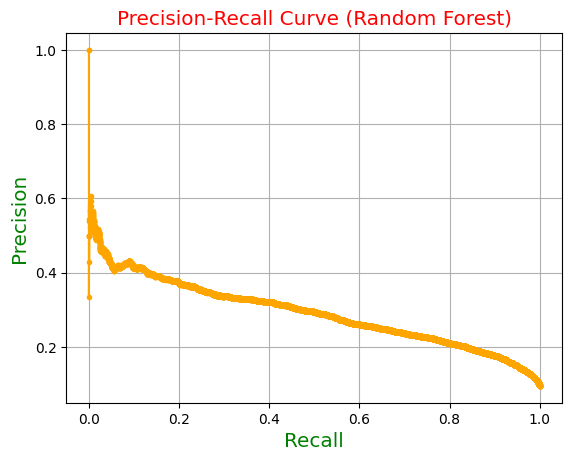

Best Threshold Using Random Forest is  0.1568693622944964

Random Forest Model Performance After Making Predictions Using the Best Threshold:
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90     45905
         1.0       0.29      0.52      0.37      4831

    accuracy                           0.83     50736
   macro avg       0.62      0.69      0.64     50736
weighted avg       0.88      0.83      0.85     50736



In [7]:
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve,classification_report
data = pandas.read_csv("Heart_Disease_Dataset.csv")
x = data.iloc[:,1:]
y = data.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 10)
rf_model = RandomForestClassifier(criterion = "gini",n_estimators = 100,max_depth = 3,random_state = 10)
rf_model.fit(x_train,y_train)
rf_proba = rf_model.predict_proba(x_test)[:,1]
rf_predict = rf_model.predict(x_test)
precision,recall,thresholds = precision_recall_curve(y_test,rf_proba)
plt.plot(recall, precision, marker='.',color = "orange")
plt.xlabel('Recall',size = "x-large",color = "green")
plt.ylabel('Precision',size = "x-large",color = "green")
plt.grid(True)
plt.title('Precision-Recall Curve (Random Forest)',size = "x-large",color = "red")
plt.show()
f1_scores = numpy.zeros_like(precision)
for i in range(len(precision)):
    if (precision[i] + recall[i]) != 0:
        f1_scores[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])
    else:
        f1_scores[i] = 0 
index = numpy.argmax(f1_scores)
best_threshold = thresholds[index]
print("Best Threshold Using Random Forest is ",best_threshold)
print()
rf_predictions = (rf_proba >= best_threshold).astype(int)
print("Random Forest Model Performance After Making Predictions Using the Best Threshold:")
print(classification_report(y_test, rf_predictions))

### (3). with Gradient Boosting

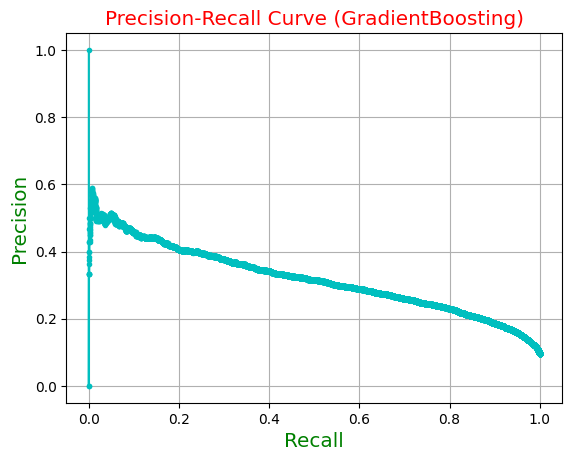

Best Threshold Using GradientBoosting is  0.17625700230031366

GradientBoosting Model Performance After Making Predictions Using the Best Threshold:
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90     45905
         1.0       0.29      0.58      0.39      4831

    accuracy                           0.83     50736
   macro avg       0.62      0.72      0.65     50736
weighted avg       0.89      0.83      0.85     50736



In [8]:
import numpy
import pandas
import matplotlib.pyplot as plt 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve,classification_report
data = pandas.read_csv("Heart_Disease_Dataset.csv")
x = data.iloc[:,1:]
y = data.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 10)
gb_model = GradientBoostingClassifier(random_state = 10)
gb_model.fit(x_train,y_train)
gb_proba = gb_model.predict_proba(x_test)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,gb_proba)
plt.plot(recall, precision, marker='.',color = "c")
plt.xlabel('Recall',size = "x-large",color = "green")
plt.ylabel('Precision',size = "x-large",color = "green")
plt.grid(True)
plt.title('Precision-Recall Curve (GradientBoosting)',size = "x-large",color = "red")
plt.show()
f1_scores = numpy.zeros_like(precision)
for i in range(len(precision)):
    if (precision[i] + recall[i]) != 0:
        f1_scores[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])
    else:
        f1_scores[i] = 0 
index = numpy.argmax(f1_scores)
best_threshold = thresholds[index]
print("Best Threshold Using GradientBoosting is ",best_threshold)
print()
gb_predictions = (gb_proba >= best_threshold).astype(int)
print("GradientBoosting Model Performance After Making Predictions Using the Best Threshold:")
print(classification_report(y_test, gb_predictions))

### Publish the performance of all the models on the same hold-out/ test dataset.

In [9]:
import numpy
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
data = pandas.read_csv("Heart_Disease_Dataset.csv")
x = data.iloc[:,1:]
y = data.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
lr_model = LogisticRegression(max_iter = 200000,random_state = 10)
rf_model = RandomForestClassifier(n_estimators = 100,criterion = "gini",random_state = 10)
gb_model = GradientBoostingClassifier(random_state = 10)
lr_model.fit(x_train_scaled,y_train)
rf_model.fit(x_train,y_train)
gb_model.fit(x_train,y_train)
lr_predict = lr_model.predict(x_test_scaled)
rf_predict = rf_model.predict(x_test)
gb_predict = gb_model.predict(x_test)
lr_predict_proba = lr_model.predict_proba(x_test_scaled)[:,1]
rf_predict_proba = rf_model.predict_proba(x_test)[:,1]
gb_predict_proba = gb_model.predict_proba(x_test)[:,1]
perfomances = pandas.DataFrame({"Logistic Regression":[accuracy_score(y_test,lr_predict),
                                                       precision_score(y_test,lr_predict),
                                                       recall_score(y_test,lr_predict),
                                                       f1_score(y_test,lr_predict),
                                                       roc_auc_score(y_test,lr_predict_proba)],
                                "Random Forest":[accuracy_score(y_test,rf_predict),
                                                 precision_score(y_test,rf_predict),
                                                 recall_score(y_test,rf_predict),
                                                 f1_score(y_test,rf_predict),
                                                 roc_auc_score(y_test,rf_predict_proba)],
                                "GradientBoosting":[accuracy_score(y_test,gb_predict),
                                                    precision_score(y_test,gb_predict),
                                                    recall_score(y_test,gb_predict),
                                                    f1_score(y_test,gb_predict),
                                                    roc_auc_score(y_test,gb_predict_proba)]},index = ["Accuracy","Precision","Recall","F1 Score","ROC AUC Score"])
print("perfomance of the all models are given below:")
perfomances

perfomance of the all models are given below:


,Logistic Regression,Random Forest,GradientBoosting
Accuracy,0.904466,0.896365,0.904703
Precision,0.486441,0.322231,0.495305
Recall,0.059408,0.080108,0.043676
F1 Score,0.105885,0.128316,0.080274
ROC AUC Score,0.825660,0.780313,0.829428


## List out the most important drivers of heart disease or attack

In [10]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
data = pandas.read_csv("Heart_Disease_Dataset.csv")
x = data.iloc[:,1:]
y = data.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
lr_model = LogisticRegression(max_iter = 100000,random_state = 10)
rf_model = RandomForestClassifier(n_estimators = 100,criterion = "gini",random_state = 10)
gb_model = GradientBoostingClassifier(random_state = 10)
lr_model.fit(x_train_scaled,y_train)
rf_model.fit(x_train,y_train)
gb_model.fit(x_train,y_train)
lr_predict = lr_model.predict(x_test_scaled)
rf_predict = rf_model.predict(x_test)
gb_predict = gb_model.predict(x_test)
importances = pandas.DataFrame({"Feature":x_train.columns,"Importance":rf_model.feature_importances_})
importances = importances.sort_values("Importance",ascending = False,ignore_index = True)
importances

,Feature,Importance
0,BMI,0.254965
1,Age,0.125305
2,Income,0.119825
3,PhysHlth,0.108751
4,Education,0.079869
5,MentHlth,0.079496
6,Fruits,0.033871
7,Diabetes,0.031496
8,HighBP,0.030303
9,Veggies,0.028295


### Using techniques such as oversampling, undersampling to handle class-imbalance

### (a). OverSampling

In [11]:
import pandas
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.metrics import classification_report
data = pandas.read_csv("Heart_Disease_Dataset.csv")
print("Class  Distribution Before OverSampling:")
print(data["HeartDiseaseorAttack"].value_counts())
print()
x = data.iloc[:,1:]
y = data.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 30,stratify=y)
oversample = RandomOverSampler(sampling_strategy='minority')
x_resampled,y_resampled = oversample.fit_resample(x_train,y_train)
v1 = Counter(y_resampled)
print("Class Distribution After OverSampling:",v1)
print()
model = RandomForestClassifier(criterion = "gini",n_estimators = 100,random_state = 30)
model.fit(x_resampled,y_resampled)
model_predict = model.predict(x_test)
print("perfomance after oversampling:")
print(classification_report(y_test,model_predict))

Class  Distribution Before OverSampling:
HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

Class Distribution After OverSampling: Counter({0.0: 183830, 1.0: 183830})

perfomance after oversampling:
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93     45957
         1.0       0.26      0.20      0.23      4779

    accuracy                           0.87     50736
   macro avg       0.59      0.57      0.58     50736
weighted avg       0.86      0.87      0.86     50736



### (b). UnderSampling

In [12]:
import pandas
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.metrics import classification_report
data = pandas.read_csv("Heart_Disease_Dataset.csv")
print("Class Distribution before UnderSampling:")
print(data["HeartDiseaseorAttack"].value_counts())
print()
x = data.iloc[:,1:]
y = data.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 30,stratify=y)
undersample = RandomUnderSampler(sampling_strategy = "majority")
x_resampled,y_resampled = undersample.fit_resample(x_train,y_train)
v1 = Counter(y_resampled)
print("Class Distribution After UnderSampling:",v1)
print()
model = RandomForestClassifier(criterion = "gini",n_estimators = 100,random_state = 30)
model.fit(x_resampled,y_resampled)
model_predict = model.predict(x_test)
print("perfomance after undersampling:")
print(classification_report(y_test,model_predict))

Class Distribution before UnderSampling:
HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

Class Distribution After UnderSampling: Counter({0.0: 19114, 1.0: 19114})

perfomance after undersampling:
              precision    recall  f1-score   support

         0.0       0.97      0.69      0.81     45957
         1.0       0.21      0.78      0.33      4779

    accuracy                           0.70     50736
   macro avg       0.59      0.74      0.57     50736
weighted avg       0.90      0.70      0.76     50736



### Using model pipeline to create end to end training and inference pipelines

### (a). End to End Training Pipeline

In [13]:
import pandas
import joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
data = pandas.read_csv("Heart_Disease_Dataset.csv")
x = data.iloc[:,1:]
y = data.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 77,stratify = y)
preprocessing_pipeline = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),('scaler', StandardScaler())])
model_pipeline = Pipeline(steps=[('preprocessing',preprocessing_pipeline),('classifier',RandomForestClassifier(random_state=42))])
model_pipeline.fit(x_train, y_train)
model_predict = model_pipeline.predict(x_test)
model_proba = model_pipeline.predict_proba(x_test)[:,1]
print("perfomance:")
print(classification_report(y_test,model_predict))
print("Pipeline:")
joblib.dump(model_pipeline,"ml_model_pipeline")

perfomance:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     45957
         1.0       0.32      0.08      0.13      4779

    accuracy                           0.90     50736
   macro avg       0.62      0.53      0.54     50736
weighted avg       0.86      0.90      0.87     50736

Pipeline:


['ml_model_pipeline']

### (b). Inference Pipeline

In [14]:
import joblib
import pandas
features = ["HighBP","HighChol","BMI","Smoker","Diabetes","PhysActivity","Fruits","Veggies","HvyAlcoholConsump","MentHlth","PhysHlth","Sex","Age","Education","Income"]
new_data = [[0.0,1.0,27.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,11.0,6.0,7.0]]
v1 = pandas.DataFrame(new_data, columns=features)
loaded_pipeline = joblib.load("ml_model_pipeline")
predict = loaded_pipeline.predict(v1)
predict_proba = loaded_pipeline.predict_proba(v1)
print("predictions:",predict)
print("predictions probabaility:",predict_proba)

predictions: [0.]
predictions probabaility: [[0.86 0.14]]
